In [21]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/arc-prize-2024/arc-agi_training_solutions.json
/kaggle/input/arc-prize-2024/arc-agi_evaluation_solutions.json
/kaggle/input/arc-prize-2024/arc-agi_evaluation_challenges.json
/kaggle/input/arc-prize-2024/sample_submission.json
/kaggle/input/arc-prize-2024/arc-agi_training_challenges.json
/kaggle/input/arc-prize-2024/arc-agi_test_challenges.json


In [22]:
training_challenges_files = "/kaggle/input/arc-prize-2024/arc-agi_training_challenges.json"
training_solutions_files = "/kaggle/input/arc-prize-2024/arc-agi_training_solutions.json"

In [23]:
import numpy as np
import json
import multiprocessing
import random
from functools import partial

In [24]:
with open(training_challenges_files) as f:
    training_challenges = json.load(f)
    
with open(training_solutions_files) as f:
    training_solutions = json.load(f)
    
# print("Training Challenges Keys:")
# print(training_challenges.keys())

# print("\nTraining Solution Keys:")
# print(training_solutions.keys())

first_challenge_key = list(training_challenges.keys())[0]
first_solution_key = list(training_solutions.keys())[0]

# print("\nSample Challenge:")
# print(json.dumps(training_challenges[first_challenge_key], indent=4))

# print("\nCorresponding Solution:")
# print(json.dumps(training_solutions[first_solution_key], indent=4))

In [25]:
import json
import matplotlib.pyplot as plt
import numpy as np

color_map = {
    0: 'black',
    1: 'blue',
    2: 'red',
    3: 'green',
    4: 'yellow',
    5: 'gray',
    6: 'magenta',
    7: 'orange',
    8: 'cyan',
    9: 'white'
}

def visualize_sample(challenge=None, solution=None):
    # Convert the challenge and solution grids to numpy arrays
    challenge = np.array(challenge, dtype=int) if challenge is not None else None
    solution = np.array(solution, dtype=int) if solution is not None else None
    
    colors = [color_map[i] for i in range(10)]
    cmap = plt.cm.colors.ListedColormap(colors)
    
    # Plot the challenge and solution
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
    
    def plot_grid(ax, data, title):
        if data is not None:
            # Create a mesh grid for pcolormesh
            x = np.arange(data.shape[1] + 1)
            y = np.arange(data.shape[0] + 1)
            ax.pcolormesh(x, y, data, cmap=cmap, vmin=0, vmax=9, edgecolors='white', linewidth=0.5)
            ax.set_title(title)
            ax.set_aspect('equal')
            ax.invert_yaxis()
        ax.axis('off')
    
    plot_grid(ax1, challenge, "Challenge")
    plot_grid(ax2, solution, "Solution")
    
    plt.tight_layout()
    plt.show()


In [26]:
training_solutions[first_solution_key][0]

[[7, 0, 7, 0, 0, 0, 7, 0, 7],
 [7, 0, 7, 0, 0, 0, 7, 0, 7],
 [7, 7, 0, 0, 0, 0, 7, 7, 0],
 [7, 0, 7, 0, 0, 0, 7, 0, 7],
 [7, 0, 7, 0, 0, 0, 7, 0, 7],
 [7, 7, 0, 0, 0, 0, 7, 7, 0],
 [7, 0, 7, 7, 0, 7, 0, 0, 0],
 [7, 0, 7, 7, 0, 7, 0, 0, 0],
 [7, 7, 0, 7, 7, 0, 0, 0, 0]]

Challenge No: 1 
example: 1
Challenge 1 input is : [[0, 0, 0, 0, 0, 0], [0, 0, 3, 0, 0, 0], [0, 3, 0, 3, 0, 0], [0, 0, 3, 0, 3, 0], [0, 0, 0, 3, 0, 0], [0, 0, 0, 0, 0, 0]] 
Challenge 1 output is : [[0, 0, 0, 0, 0, 0], [0, 0, 3, 0, 0, 0], [0, 3, 4, 3, 0, 0], [0, 0, 3, 4, 3, 0], [0, 0, 0, 3, 0, 0], [0, 0, 0, 0, 0, 0]]


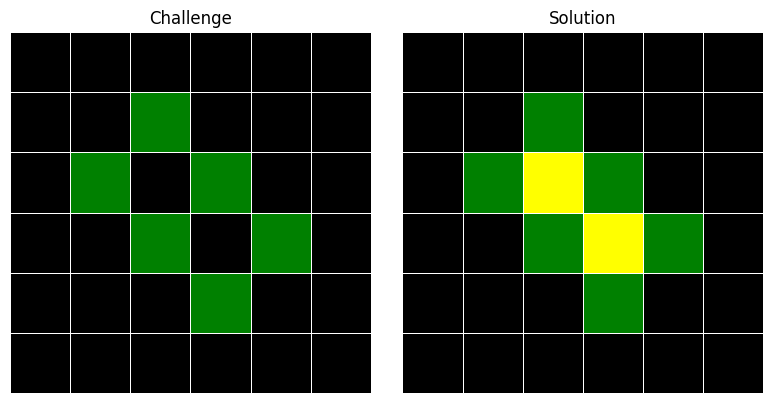

example: 2
Challenge 2 input is : [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 3, 0, 3, 0, 0, 0, 0, 0], [0, 0, 0, 3, 0, 3, 0, 0, 0, 0], [0, 0, 3, 0, 0, 0, 3, 0, 0, 0], [0, 0, 0, 0, 0, 3, 0, 3, 0, 0], [0, 0, 0, 3, 0, 3, 3, 0, 0, 0], [0, 0, 3, 3, 3, 0, 0, 0, 0, 0], [0, 0, 0, 3, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]] 
Challenge 2 output is : [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 3, 0, 3, 0, 0, 0, 0, 0], [0, 0, 0, 3, 0, 3, 0, 0, 0, 0], [0, 0, 3, 0, 0, 0, 3, 0, 0, 0], [0, 0, 0, 0, 0, 3, 4, 3, 0, 0], [0, 0, 0, 3, 0, 3, 3, 0, 0, 0], [0, 0, 3, 3, 3, 0, 0, 0, 0, 0], [0, 0, 0, 3, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


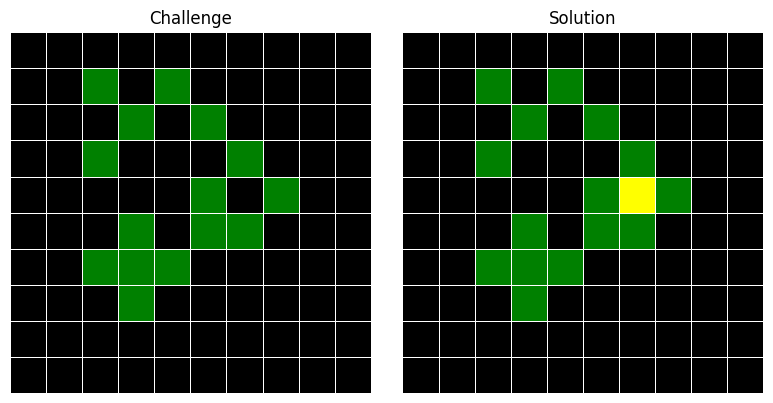

example: 3
Challenge 3 input is : [[0, 0, 0, 0, 0, 3, 0, 0, 0, 0], [0, 0, 0, 0, 3, 0, 0, 0, 0, 0], [0, 3, 3, 0, 3, 3, 0, 3, 0, 0], [3, 0, 0, 3, 0, 0, 3, 0, 3, 0], [0, 0, 0, 3, 0, 0, 3, 3, 0, 0], [0, 0, 0, 3, 0, 0, 3, 0, 0, 0], [0, 0, 0, 3, 0, 0, 3, 0, 0, 0], [0, 0, 0, 0, 3, 3, 0, 3, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 3, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]] 
Challenge 3 output is : [[0, 0, 0, 0, 0, 3, 0, 0, 0, 0], [0, 0, 0, 0, 3, 0, 0, 0, 0, 0], [0, 3, 3, 0, 3, 3, 0, 3, 0, 0], [3, 0, 0, 3, 4, 4, 3, 4, 3, 0], [0, 0, 0, 3, 4, 4, 3, 3, 0, 0], [0, 0, 0, 3, 4, 4, 3, 0, 0, 0], [0, 0, 0, 3, 4, 4, 3, 0, 0, 0], [0, 0, 0, 0, 3, 3, 0, 3, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 3, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


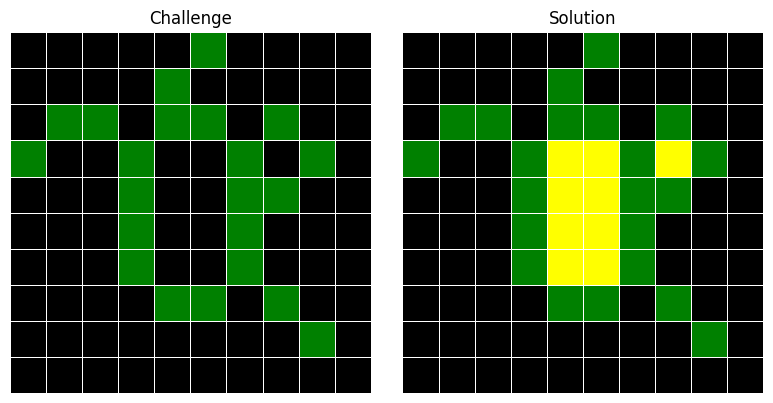

example: 4
Challenge 4 input is : [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 3, 3, 3, 3, 0, 0, 0, 0], [0, 0, 3, 0, 0, 3, 0, 0, 0, 0], [0, 0, 3, 0, 0, 3, 0, 3, 0, 0], [0, 0, 3, 3, 3, 3, 3, 3, 3, 0], [0, 0, 0, 3, 0, 0, 0, 0, 3, 0], [0, 0, 0, 3, 0, 0, 0, 3, 3, 0], [0, 0, 0, 3, 3, 0, 0, 3, 0, 3], [0, 0, 0, 3, 0, 3, 0, 0, 3, 0], [0, 0, 0, 0, 3, 0, 0, 0, 0, 0]] 
Challenge 4 output is : [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 3, 3, 3, 3, 0, 0, 0, 0], [0, 0, 3, 4, 4, 3, 0, 0, 0, 0], [0, 0, 3, 4, 4, 3, 0, 3, 0, 0], [0, 0, 3, 3, 3, 3, 3, 3, 3, 0], [0, 0, 0, 3, 0, 0, 0, 0, 3, 0], [0, 0, 0, 3, 0, 0, 0, 3, 3, 0], [0, 0, 0, 3, 3, 0, 0, 3, 4, 3], [0, 0, 0, 3, 4, 3, 0, 0, 3, 0], [0, 0, 0, 0, 3, 0, 0, 0, 0, 0]]


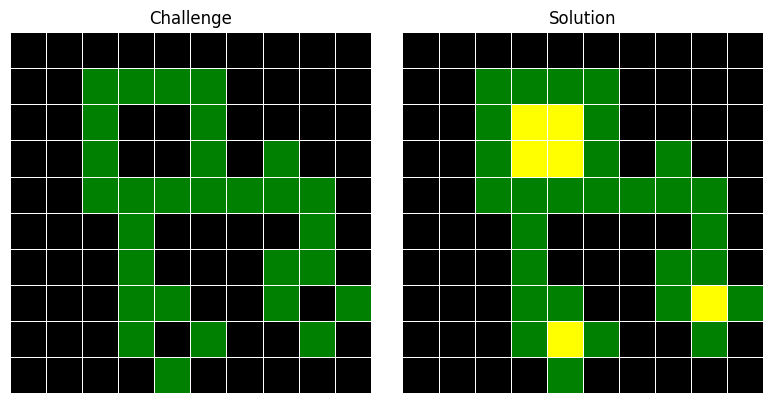

example: 5
Challenge 5 input is : [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 3, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0], [0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0], [0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0], [0, 0, 3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 3, 0, 3, 0, 0], [0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0], [0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 3, 0, 0, 3, 3, 3, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0

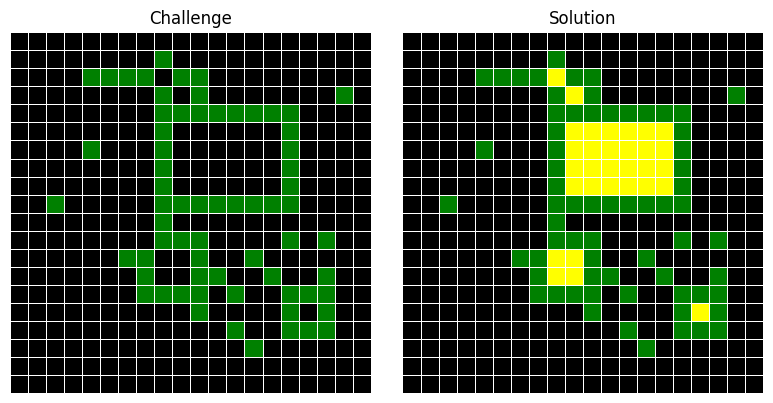

Challenge is: 


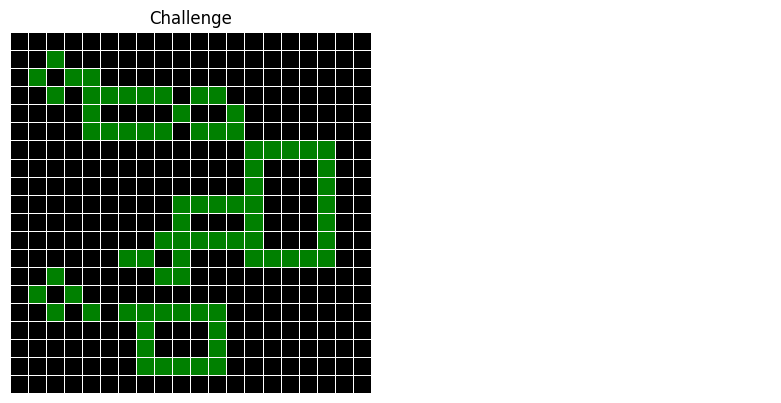





Corresponding Solution is: 


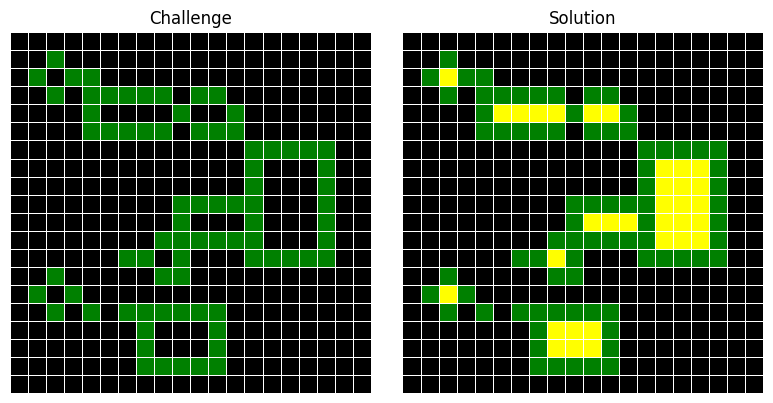

In [27]:
def challenge_visualize(start, end):
    if start < end:
        for j in range(start, end):
            print(f"Challenge No: {j} ")

            #visualizing the train
            challenge_key = list(training_challenges.keys())[j]
            challenge = training_challenges[challenge_key]['train']

            for i in range(len(challenge)):
                print(f"example: {i+1}")
                print(f"Challenge {i+1} input is : {challenge[i]['input']} \nChallenge {i+1} output is : {challenge[i]['output']}")
                visualize_sample(challenge[i]['input'], challenge[i]['output'])

            # visualizing the test
            print("Challenge is: ")
            challenge_test = training_challenges[challenge_key]['test'][0]['input']
            visualize_sample(challenge=challenge_test,solution=None)
            print("\n\n\n")

            #visualizing the corresponding solution
            print("Corresponding Solution is: ")
            solution_key = list(training_solutions.keys())[j]
            solution = training_solutions[solution_key][0]
            visualize_sample(challenge=challenge_test, solution=solution)

challenge_visualize(1, 2)




In [28]:
def print_matrix(matrix):
    for row in matrix:
        print(row)

print("Challenge:")
challenge_key = list(training_challenges.keys())[1]
challenge_test = training_challenges[challenge_key]['test'][0]['input']
print_matrix(challenge_test)

print("\nSolution:")
solution_key = list(training_solutions.keys())[1]
solution = training_solutions[solution_key][0]
print_matrix(solution)

Challenge:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 3, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 0, 0, 0, 3, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 0, 0, 0, 3, 0, 0]
[0, 0, 0, 0, 0, 0, 3, 3, 0, 3, 0, 0, 0, 3, 3, 3, 3, 3, 0, 0]
[0, 0, 3, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 

In [31]:
def solve_challenge(challenge):
    rows = len(challenge)
    cols = len(challenge[0])
    solution = [row[:] for row in challenge]  # Create a copy of the input matrix

    def count_surrounding_threes(i, j):
        count = 0
        for di in [-1, 0, 1]:
            for dj in [-1, 0, 1]:
                if di == 0 and dj == 0:
                    continue
                if 0 <= i+di < rows and 0 <= j+dj < cols and challenge[i+di][j+dj] == 3:
                    count += 1
        return count

    for i in range(rows):
        for j in range(cols):
            if challenge[i][j] == 0 and count_surrounding_threes(i, j) >= 4:
                solution[i][j] = 4

    return solution

def print_matrix(matrix):
    for row in matrix:
        print(row)

# Example usage
challenge1 = [
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 3, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 0, 0, 0, 3, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 0, 0, 0, 3, 0, 0],
    [0, 0, 0, 0, 0, 0, 3, 3, 0, 3, 0, 0, 0, 3, 3, 3, 3, 3, 0, 0],
    [0, 0, 3, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
]

print("Challenge:")
print_matrix(challenge1)

solution1 = solve_challenge(challenge1)

print("\nSolution:")
print_matrix(solution1)

Challenge:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 3, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 0, 0, 0, 3, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 0, 0, 0, 3, 0, 0]
[0, 0, 0, 0, 0, 0, 3, 3, 0, 3, 0, 0, 0, 3, 3, 3, 3, 3, 0, 0]
[0, 0, 3, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 

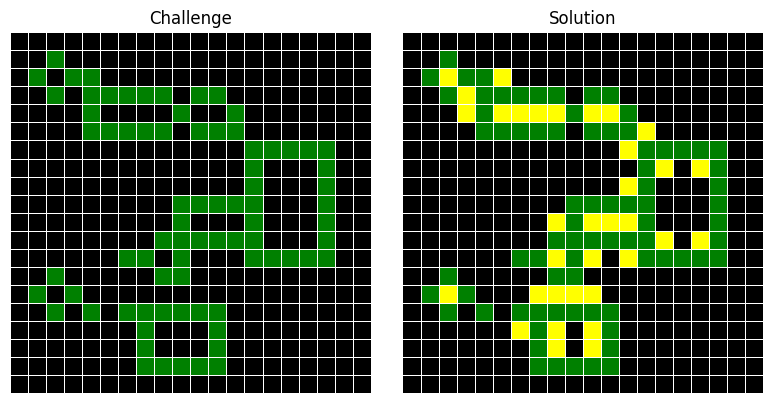

In [32]:
visualize_sample(challenge=challenge1, solution=solution1)


In [40]:
import numpy as np
from scipy.ndimage import label, binary_fill_holes

def find_enclosed_regions(matrix):
    # Convert the matrix to a numpy array
    matrix = np.array(matrix)
    
    # Find the connected components of 3s
    structure = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]])  # 4-connectivity
    labeled, ncomponents = label(matrix == 3, structure=structure)
    
    for i in range(1, ncomponents + 1):
        component = (labeled == i)
        
        # Fill holes in the component, i.e., find enclosed regions
        filled = binary_fill_holes(component)
        
        # Get the enclosed region (where the filled differs from the original component)
        enclosed_region = filled & ~component
        
        # Change enclosed 0s to 4s
        matrix[enclosed_region & (matrix == 0)] = 4
    
    # Now, check for individual 0s enclosed by 3s on all four sides
    for i in range(1, matrix.shape[0] - 1):
        for j in range(1, matrix.shape[1] - 1):
            if matrix[i, j] == 0:
                if matrix[i-1, j] == 3 and matrix[i+1, j] == 3 and matrix[i, j-1] == 3 and matrix[i, j+1] == 3:
                    matrix[i, j] = 4
    
    return matrix.tolist()

# Test the function with your challenge matrix
challenge_matrix = [
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 3, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 0, 0, 0, 3, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 0, 0, 0, 3, 0, 0],
    [0, 0, 0, 0, 0, 0, 3, 3, 0, 3, 0, 0, 0, 3, 3, 3, 3, 3, 0, 0],
    [0, 0, 3, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
]

solution_matrix = find_enclosed_regions(challenge_matrix)

# Print the solution matrix
for row in solution_matrix:
    print(row)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 3, 4, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 4, 4, 3, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 4, 4, 3, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 4, 4, 4, 3, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 4, 4, 3, 4, 4, 4, 3, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 4, 4, 4, 3, 0, 0]
[0, 0, 0, 0, 0, 0, 3, 3, 4, 3, 0, 0, 0, 3, 3, 3, 3, 3, 0, 0]
[0, 0, 3, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 3, 4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 3,

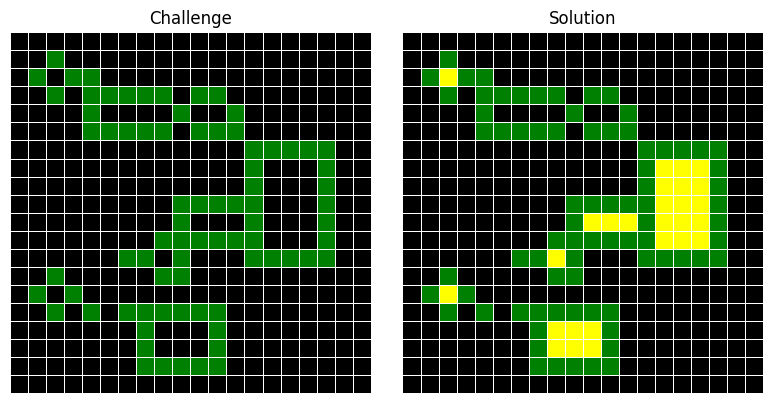

In [41]:
visualize_sample(challenge=challenge_matrix, solution=solution_matrix)
